# **Gold Price Prediction using Random Forest Regressor**

  This project focuses on predicting the price of gold using a Random Forest Regressor algorithm. It utilizes historical data and various features to train the model and make predictions on future gold prices.



##**Introduction**
Gold is a widely traded precious metal with prices influenced by various economic, political, and market factors. Predicting the price of gold can be valuable for investors, traders and financial analysts. In this project, we aim to build a perdictive model using the Random Forest Regressor algorithm to forecast gold prices based on historical data.

#**Import Libraries**


In [1]:
import numpy as np  #Linear algebra
import pandas as pd  #data processing, CSV  file I/O (e.g pd.read_csv)
import matplotlib.pyplot as plt  #plotting graphs and charts
import seaborn as sns  #drawing staistical graphics
from sklearn.model_selection import train_test_split #import package  for splitting data set
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics # Import metrics package from sklearn for statistical analysis


#**Data Collection**




In [2]:
# loading the csv data to a pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

###**Data overview:**
 This data file is a Comma separated value file format  with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX, GLD, USO, SLV, EUR/USD against the dates in the date column.
###**Data Dictionary:**
* Date - mm/dd/yyyy
* SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.
* GLD - Gold Price
* USO - United States Oil Fund-Not  Sure of UOM
* SLV - Silver Price
* EUR/USD - currency pair quotation of the Euro against the USD






In [3]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#Display features in data set
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

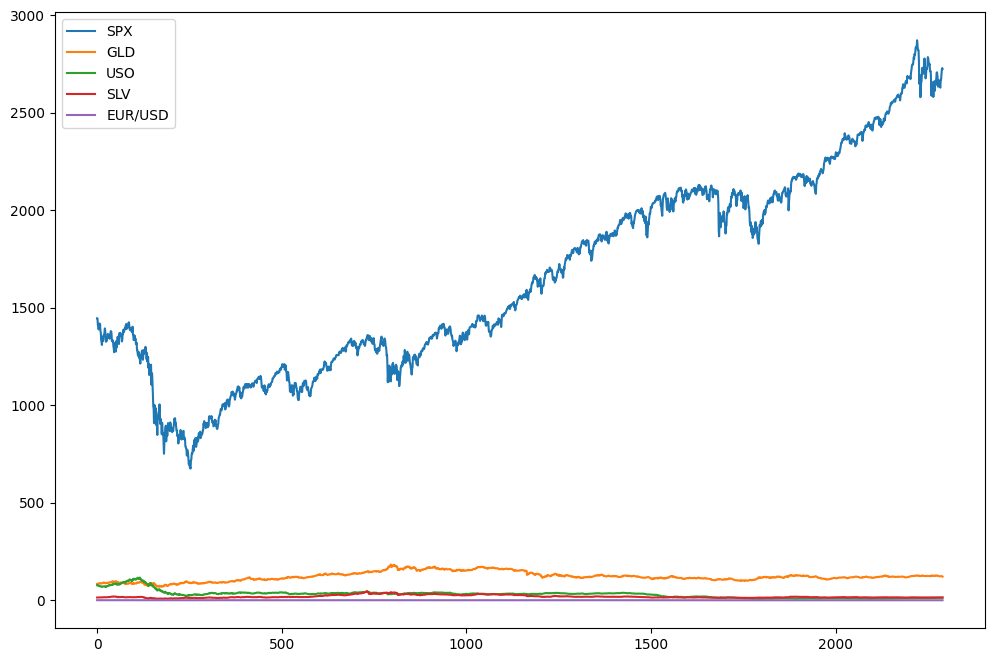

In [10]:
#Import package for data plots
plt.rcParams['figure.figsize']= [12,8]
gold_data.plot()
plt.show

In [11]:
gold_data.mean()

<ipython-input-11-37a9bc9210d2>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold_data.mean()


SPX        1654.315776
GLD         122.732875
USO          31.842221
SLV          20.084997
EUR/USD       1.283653
dtype: float64

we will not use the colum of the date  because our data does not depend on it.

#**Visualization Analysis**

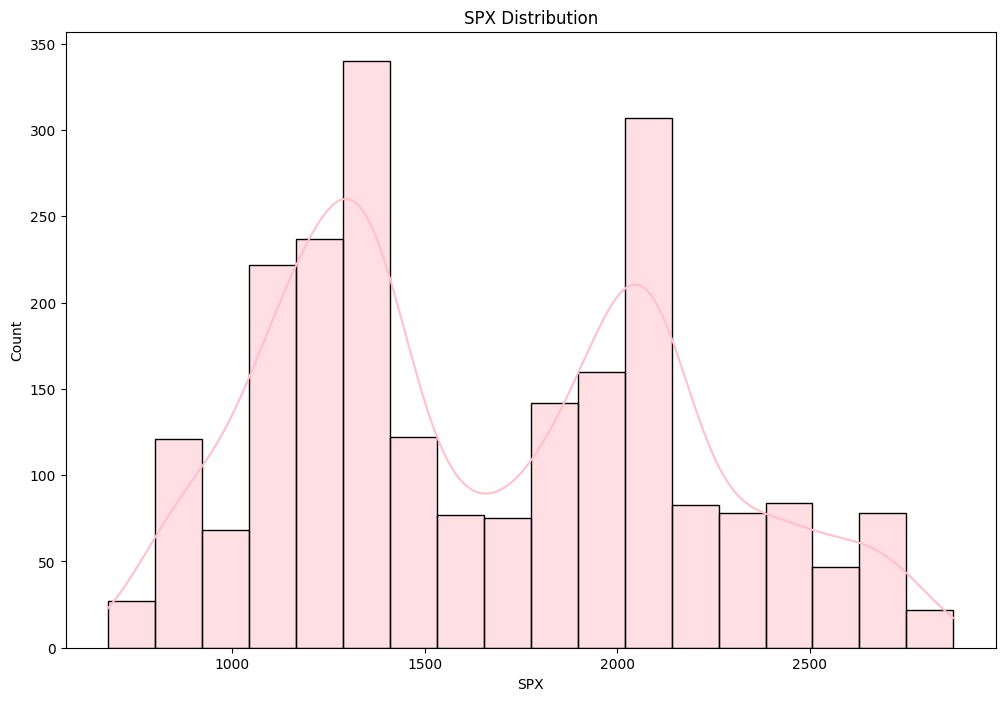

In [12]:
 #distribution of SPX
plt.title("SPX Distribution")
sns.histplot(data=gold_data, x='SPX', kde=True, color='pink')
plt.show()


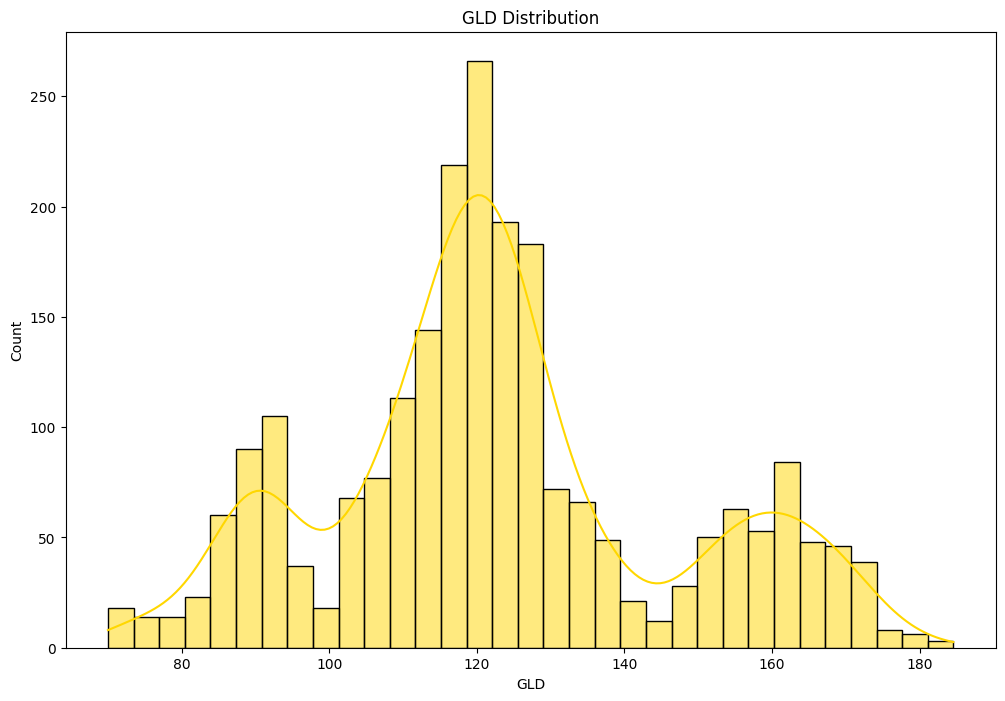

In [13]:
# distribution of GLD
plt.title("GLD Distribution")
sns.histplot(data=gold_data, x='GLD', kde=True, color='gold')
plt.show()

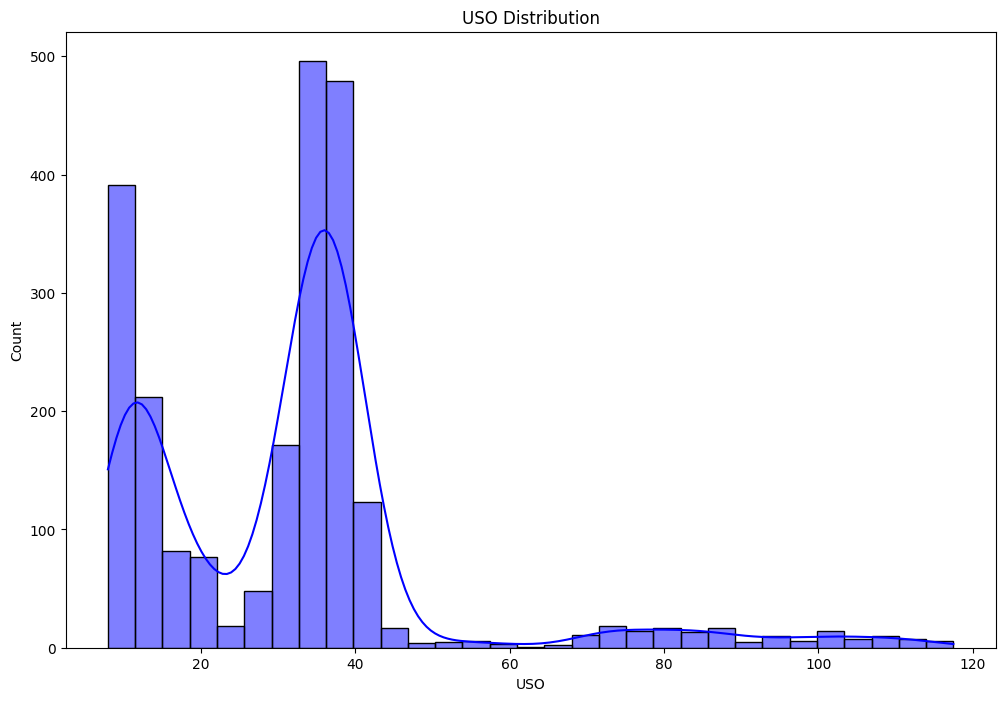

In [14]:
# distribution of USO
plt.title("USO Distribution")
sns.histplot(data=gold_data, x='USO', kde=True, color='blue')
plt.show()

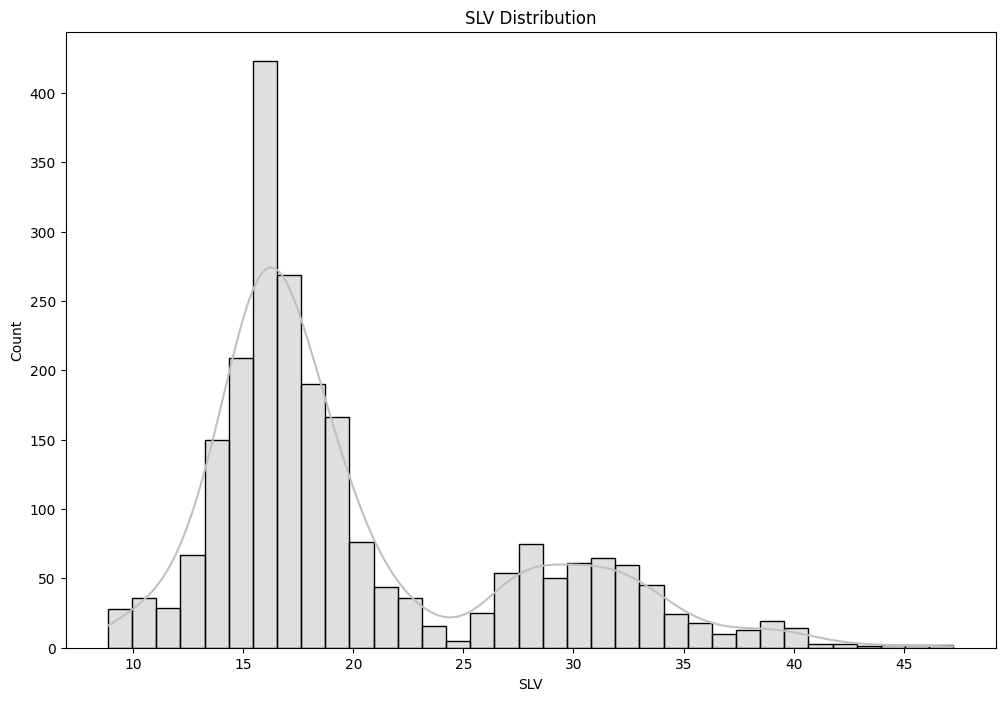

In [15]:
# distribution of SLV
plt.title("SLV Distribution")
sns.histplot(data=gold_data, x='SLV', kde=True, color='silver')
plt.show()

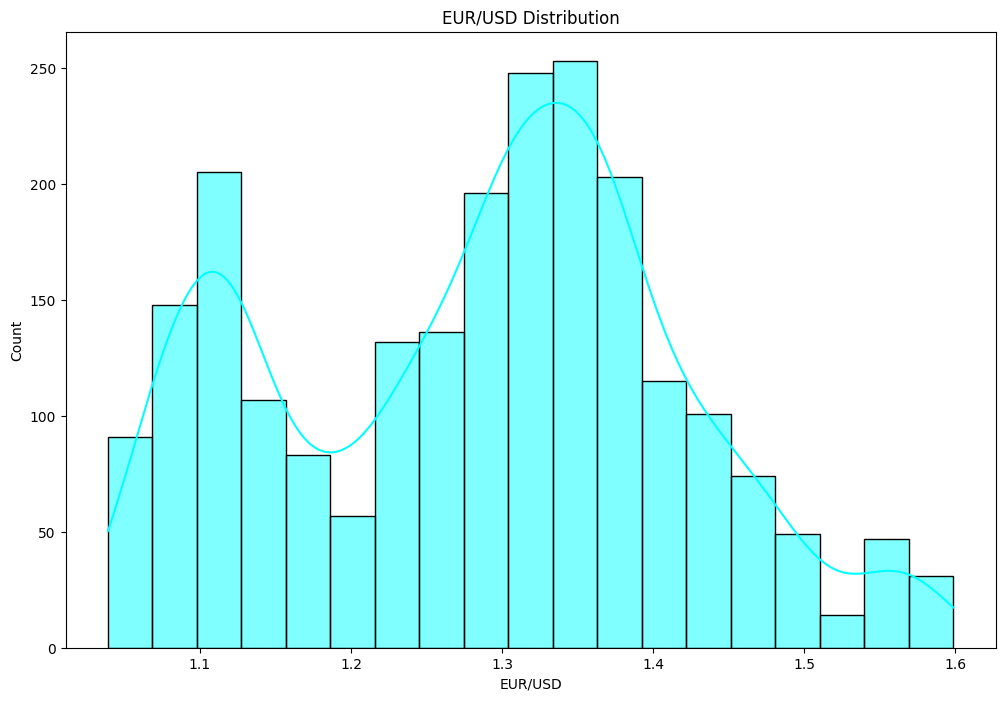

In [16]:
# distribution of EUR/USD
plt.title("EUR/USD Distribution")
sns.histplot(data=gold_data, x='EUR/USD', kde=True, color='cyan')
plt.show()

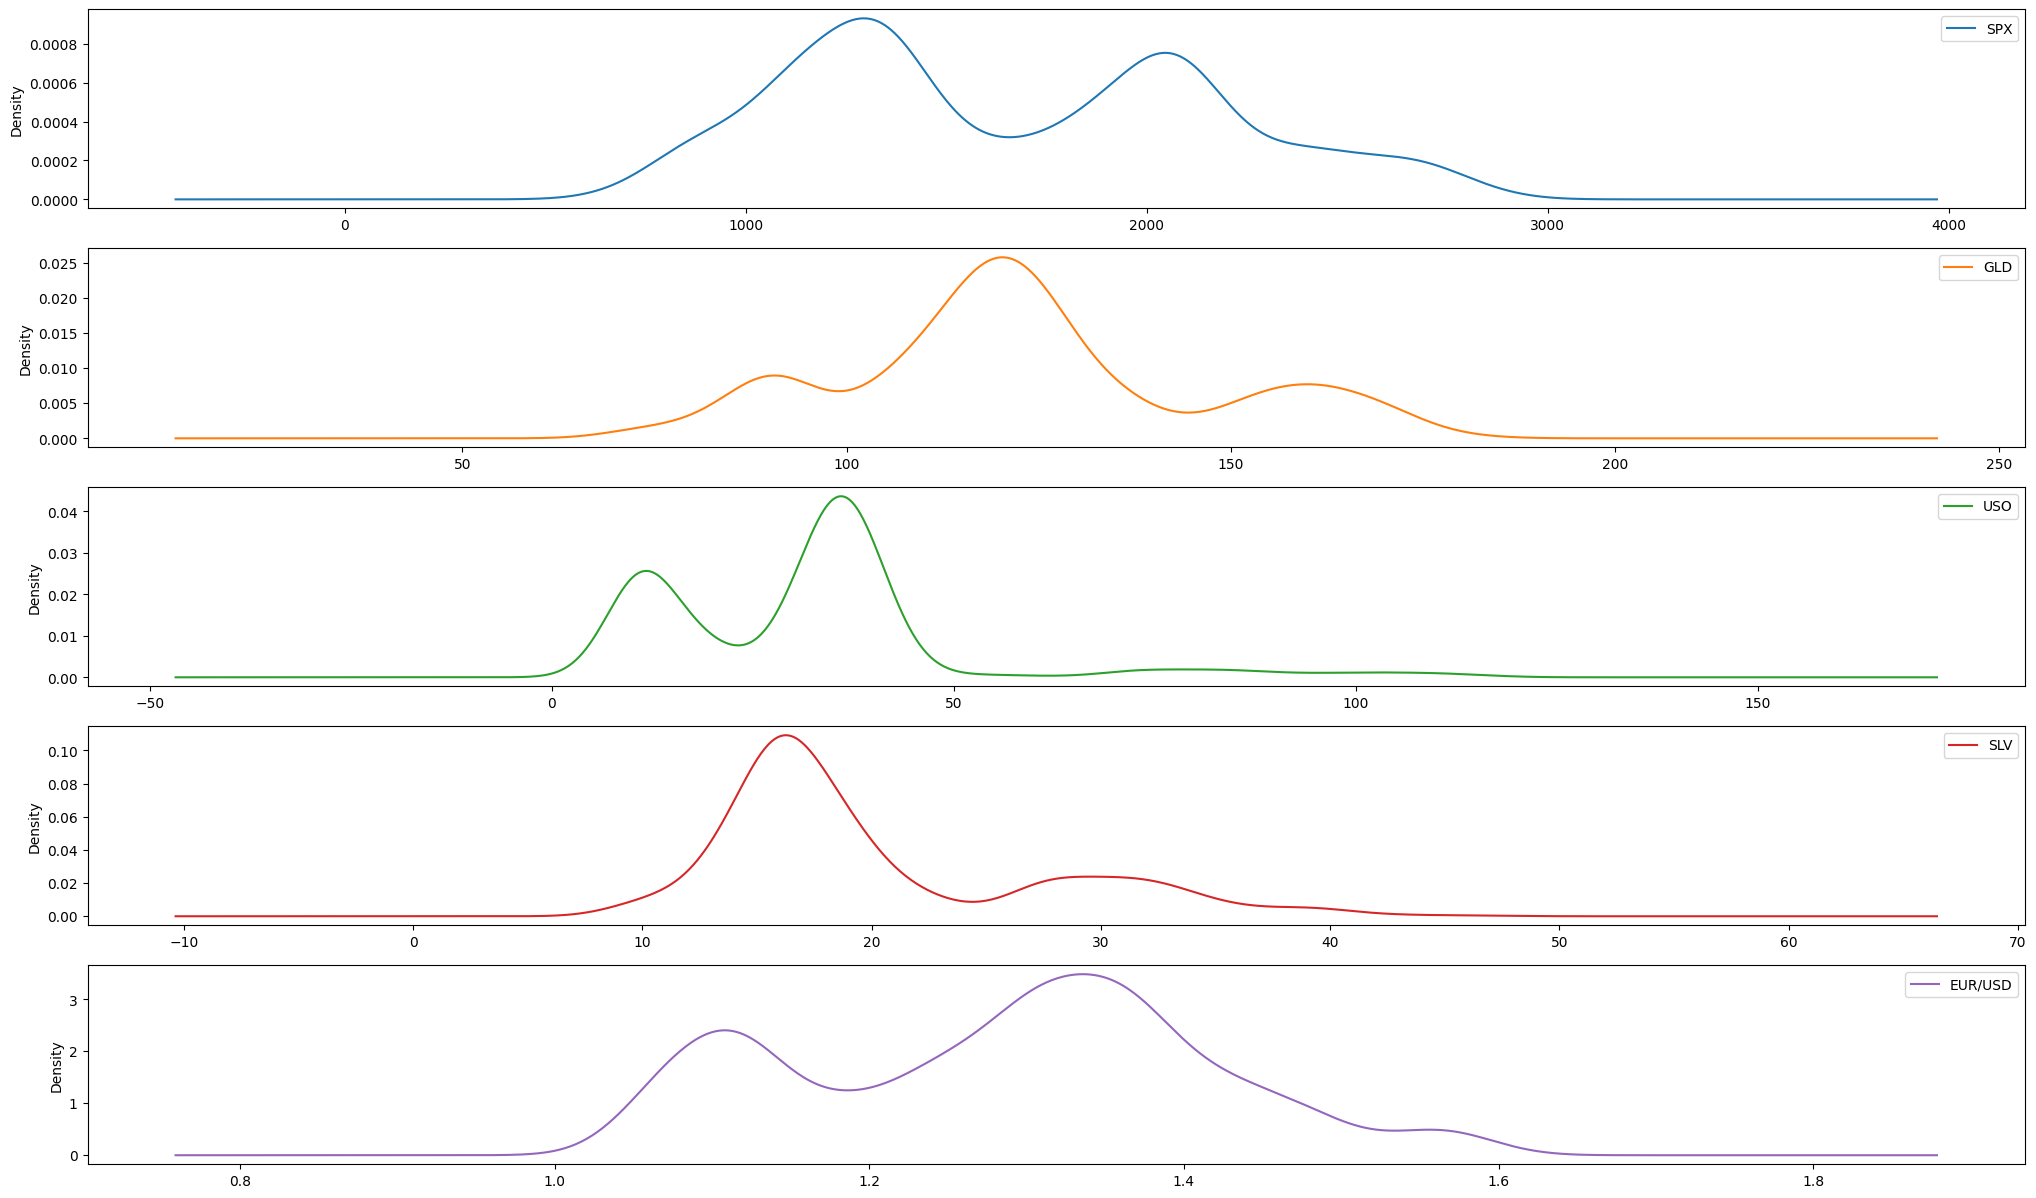

In [17]:
gold_data.plot(kind="kde", subplots=True, layout=(5,1), figsize=(25,15),sharex=False, sharey=False);

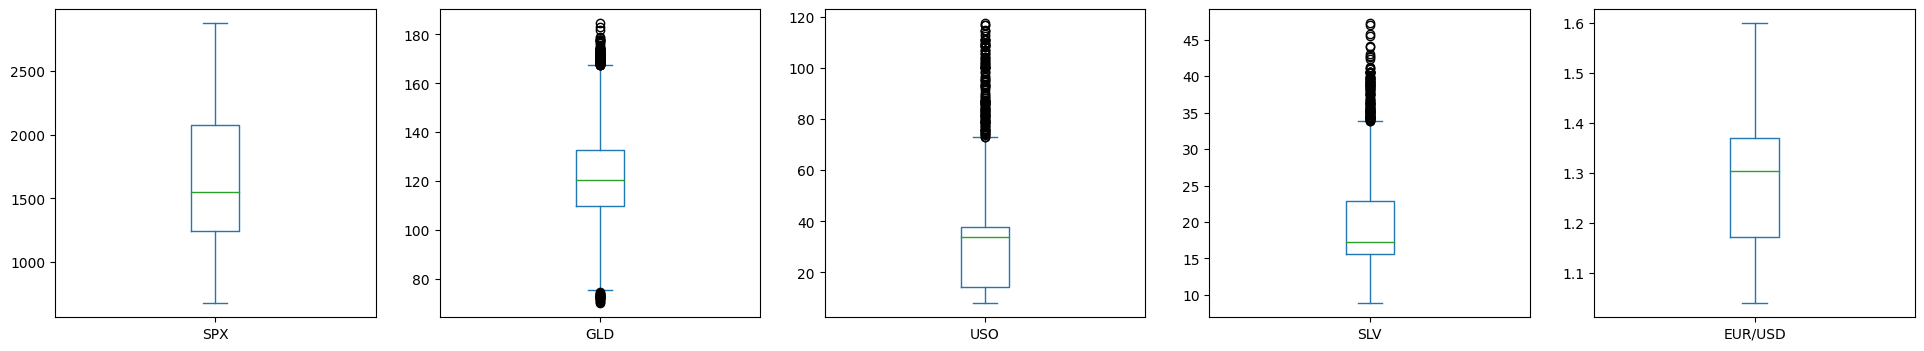

In [18]:
gold_data.plot(kind="box", subplots=True, layout=(1,5), figsize=(24,4),sharex=False, sharey=False);

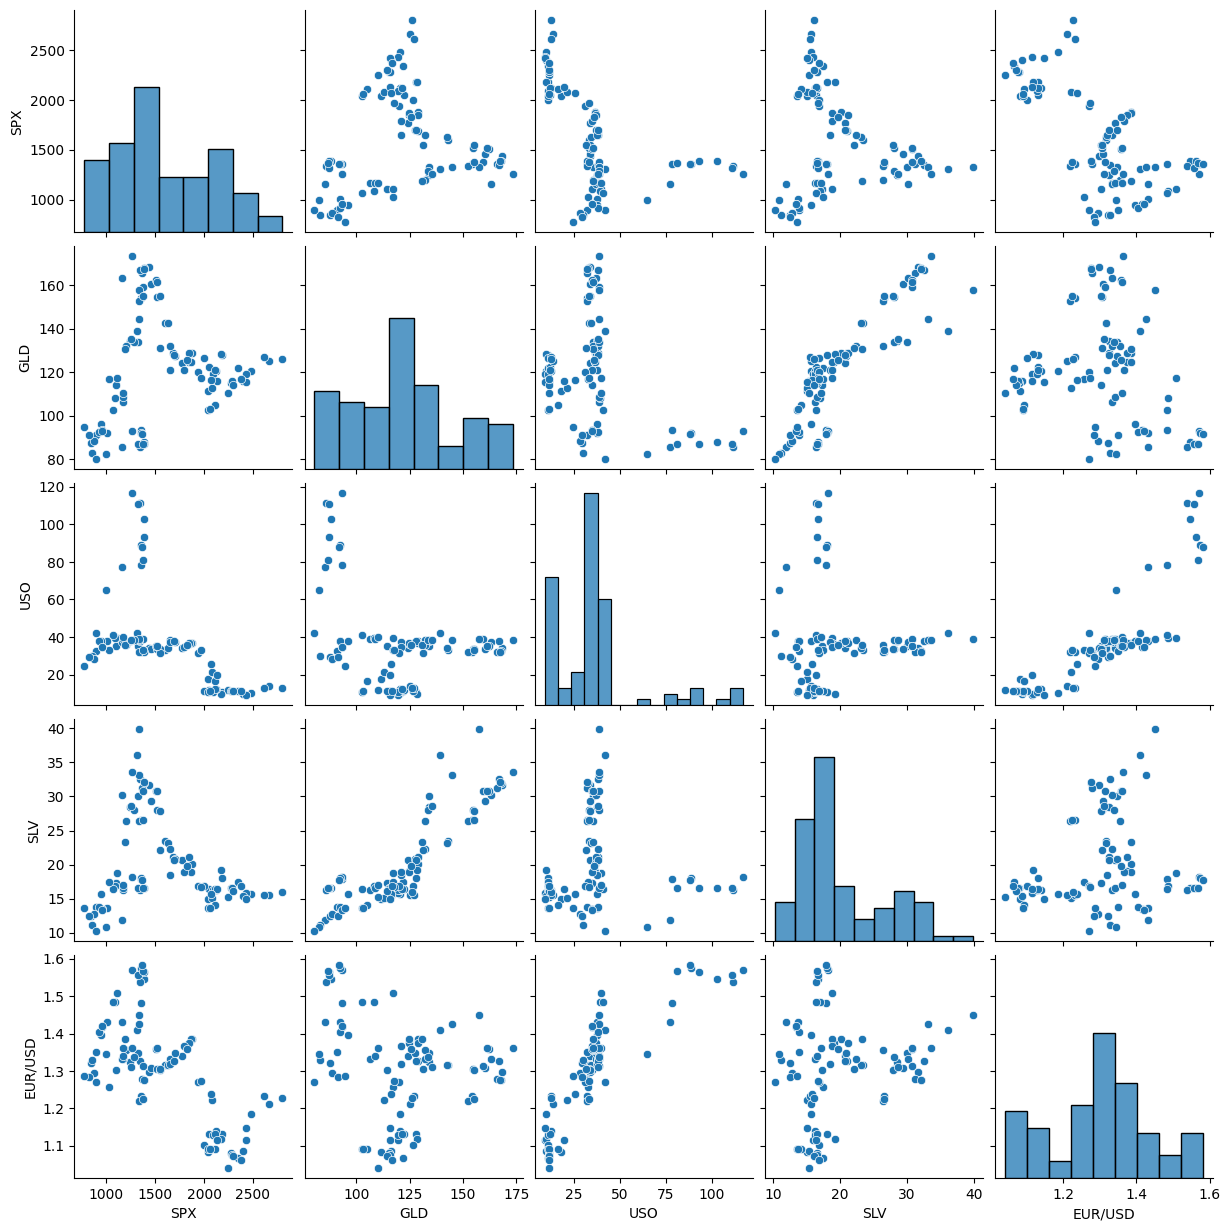

In [19]:
sns.pairplot(gold_data.sample(n=100));

##**Correlations:**
Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.

1. **Positive correlation**
Two features (variables) can be positively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) also increases.


2. **Negative correlation**
Two features (variables) can be negatively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) decreases.

In [20]:
correlation = gold_data.corr()

<ipython-input-20-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

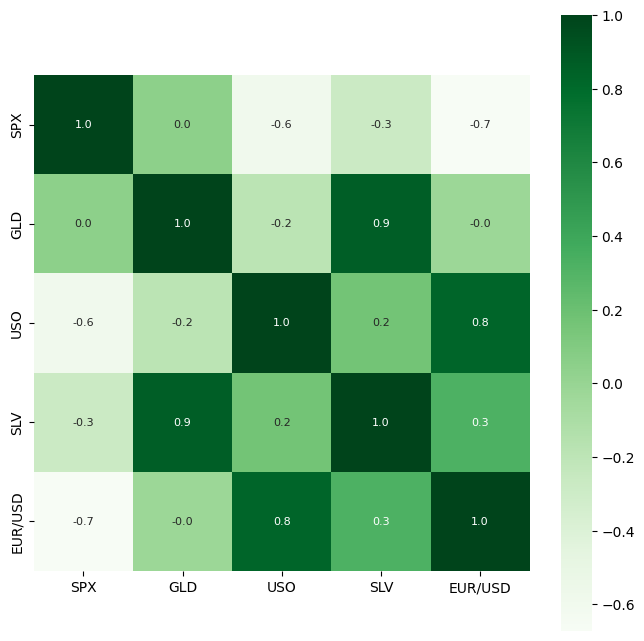

In [21]:
#constructing a heatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [22]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


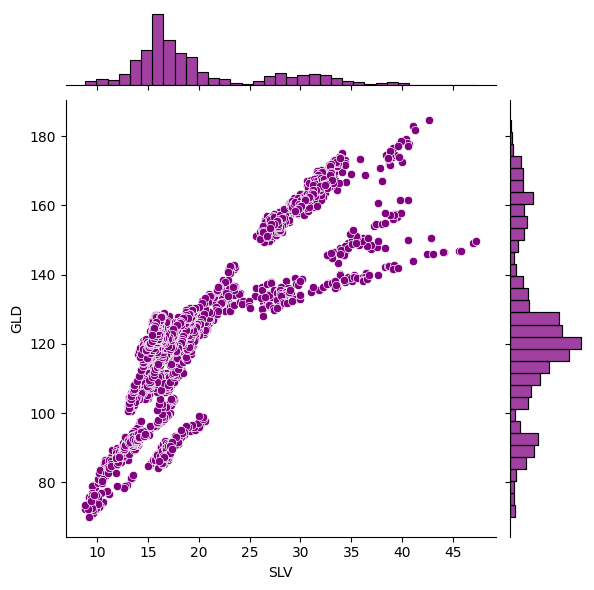

In [23]:
#Now we check the relation with GLD variable
sns.jointplot(x =gold_data['SLV'], y = gold_data['GLD'], color = 'purple')

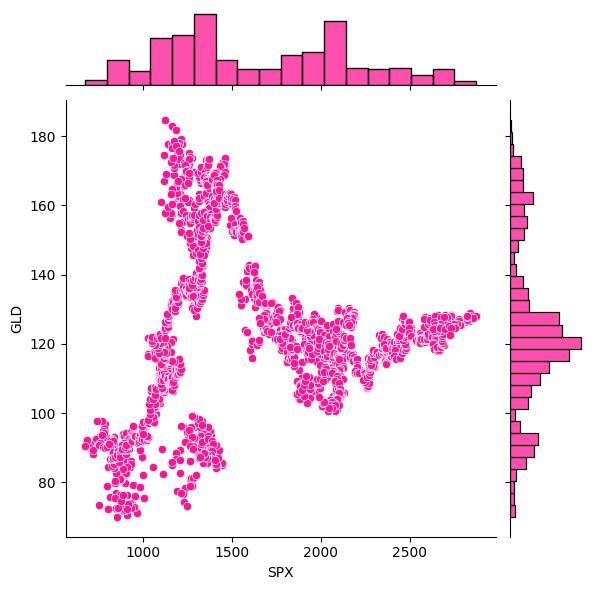

In [24]:
#Now we check the relation with GLD variable
sns.jointplot(x =gold_data['SPX'], y = gold_data['GLD'], color = 'deeppink')

#**Splitting the Features and Targets**

In [25]:
#discard the gold and use the rest values as features
x= gold_data.drop(['Date','GLD'], axis=1)

#use the gold as the target
y= gold_data['GLD']

In [26]:
#The features (input)
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
#The target
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# **Random Forest Regression**
Random Forest Regression algorithms are a class of Machine Learning algorithms that use the combination of multiple random decision trees each trained on a subset of data. The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.

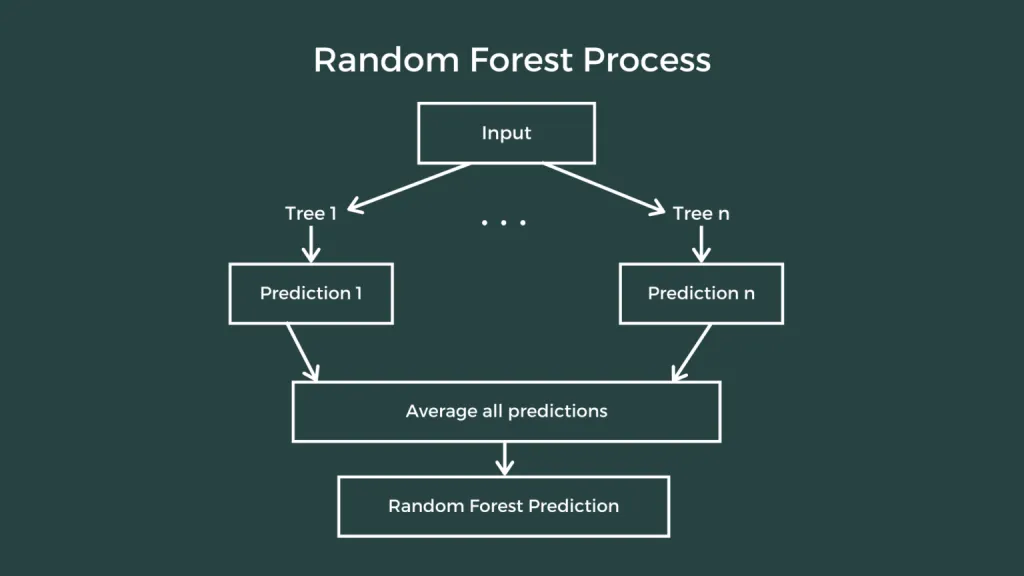




The algorithm creates each tree from a different sample of input data. At each node, a different sample of features is selected for splitting and the trees run in parallel without any interaction. The predictions from each of the trees are then averaged to produce a single result which is the prediction of the Random Forest.


##**Splitting into Training Data and Testing Data**





In [28]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [29]:
# Split data into train and test set: 80% / 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [30]:
len(x_train)

1832

In [31]:
len(x_test)

458

In [32]:
x_train.shape

(1832, 4)

In [33]:
x_test.shape

(458, 4)

##**Train the Model**


In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
#training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

#**Model Evaluation**

In [36]:
#Prediction on test data
y_pred = regressor.predict(x_test)

In [37]:
print(y_pred)

[168.51559909  82.25179949 115.64600009 127.5151005  120.57780145
 154.69529844 150.82279912 126.08950041 117.4827986  126.00240065
 116.8689009  171.58190081 141.32029808 167.86419918 115.22199996
 117.60350028 137.31030328 170.17070117 159.39950251 161.09219948
 155.08720024 125.55340011 175.92329934 157.58950349 125.10290056
  93.85009962  77.71559987 120.52400008 119.07749951 167.43629974
  88.24790039 125.30570034  91.09940088 117.68439998 121.05169906
 136.20210091 115.39790117 114.95420101 146.74149994 107.13360115
 103.53150242  87.15749828 126.51030081 117.8622002  154.20459867
 119.61560005 108.41859997 108.1501985   93.18970091 127.20339747
  75.20340063 113.66439942 121.53300008 111.22179879 118.88939898
 120.62669948 158.80789973 168.19920136 146.86849667  85.55639835
  94.1690004   86.72379897  90.58050015 118.80990095 126.35750058
 127.6707002  168.88220051 122.13799926 117.17969892  98.47450033
 167.37190127 142.91719776 131.98320266 121.04050186 121.13839953
 119.80500

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


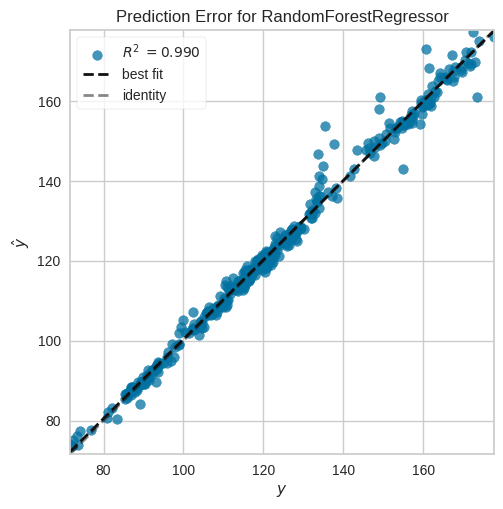

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [38]:
from yellowbrick.regressor.influence import Visualizer
#plotting the prediction errors
from yellowbrick.regressor import PredictionError
Visualizer = PredictionError(regressor)
Visualizer.fit(x_train, y_train)
Visualizer.score(x_test, y_test)
Visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


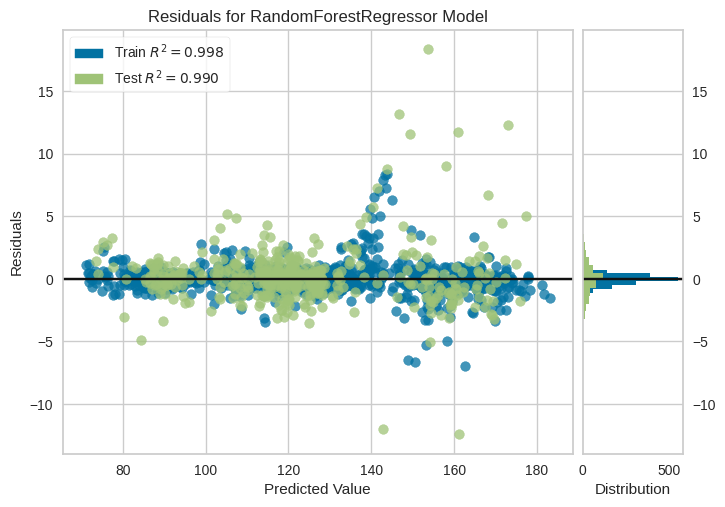

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [39]:
#plotting the residuals
from yellowbrick.regressor import ResidualsPlot
Visualizer = ResidualsPlot(regressor)
Visualizer.fit(x_train, y_train)
Visualizer.score(x_test, y_test)
Visualizer.poof()

In [40]:
y_test = np.array(y_test)

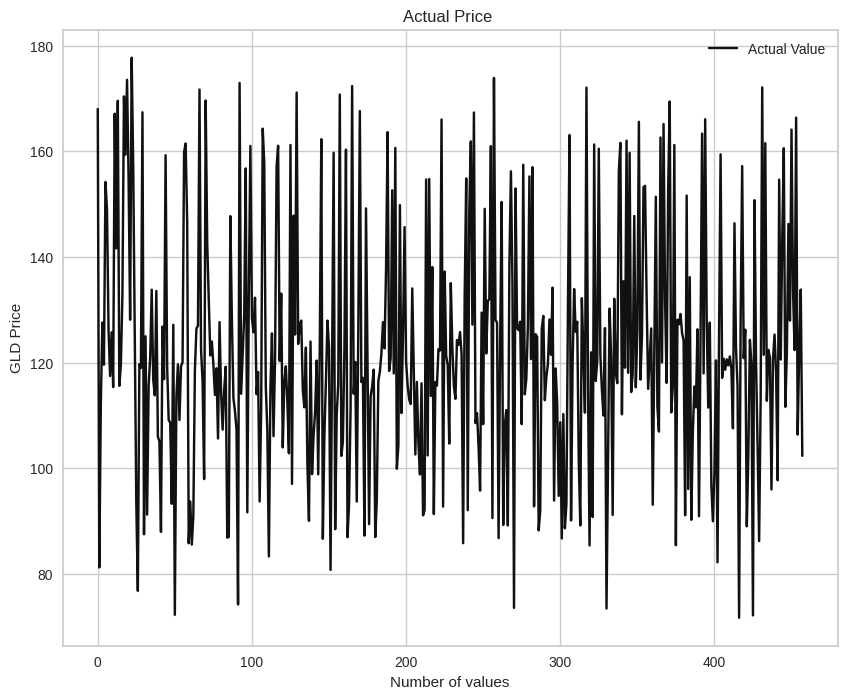

In [41]:
plt.rcParams['figure.figsize']=[10,8]
plt.plot(y_test, color='k', label='Actual Value')
plt.title('Actual Price ')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

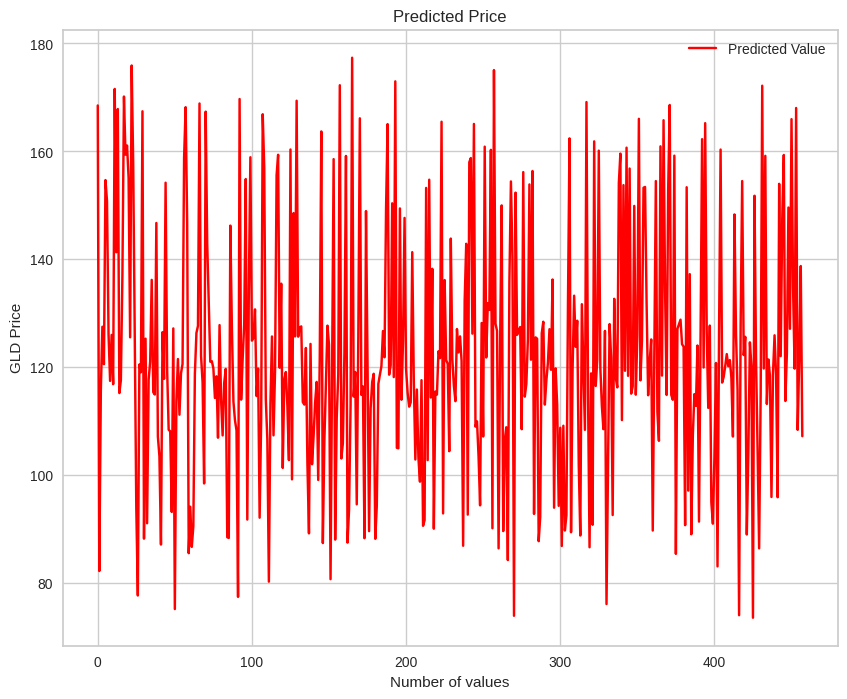

In [42]:
plt.rcParams['figure.figsize']=[10,8]
plt.plot(y_pred, color='red', label='Predicted Value')
plt.title('Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

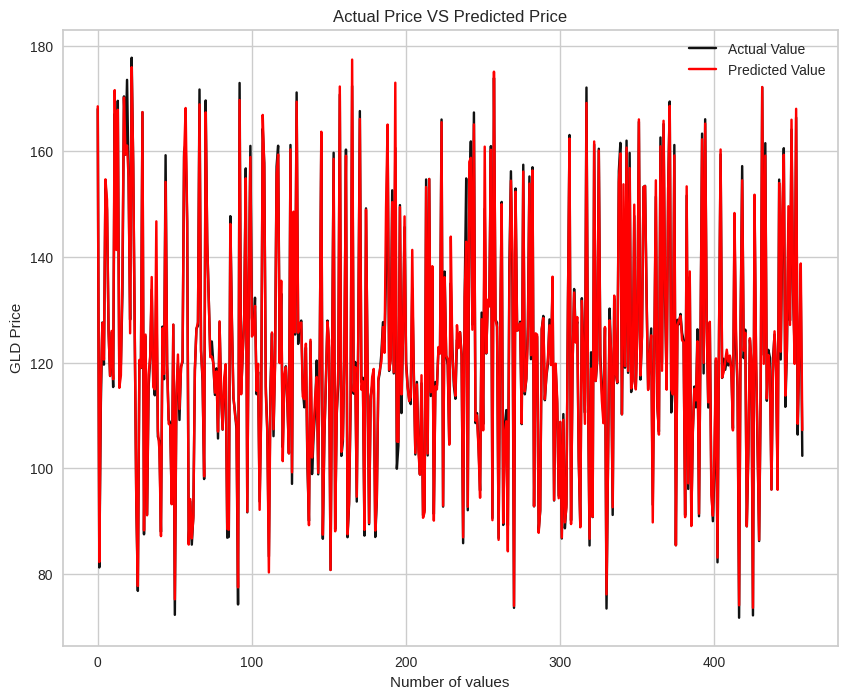

In [43]:
plt.rcParams['figure.figsize']=[10,8]
plt.plot(y_test, color='k', label='Actual Value')
plt.plot(y_pred, color='red', label='Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

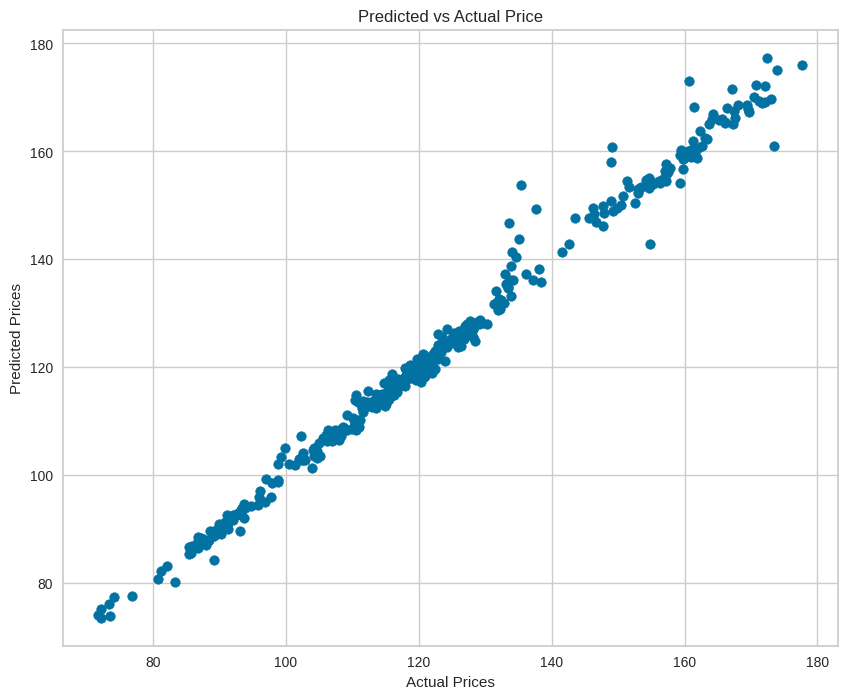

In [44]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Price')
plt.show()


In [45]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9984761976983867
0.9897101491077904


#**Error Evaluation Metrics**


1.**Mean Absolute Error(MAE):**
MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

2.**Mean Squared Error(MSE):**
Mean squared error states that finding the squared difference between actual and predicted value.

3.**Root Mean Squared Error(RMSE):**
 RMSE is clear by the name itself, that it is a simple square root of mean squared error.








In [46]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [47]:
gold_data['GLD'].describe()

count    2290.000000
mean      122.732875
std        23.283346
min        70.000000
25%       109.725000
50%       120.580002
75%       132.840004
max       184.589996
Name: GLD, dtype: float64

In [48]:
#Print the values of MAE, MSE, RMAE
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.3325552152838387
MSE :   5.42731497579056
RMAE :   2.3296598412194345


#**R-Squared Error**

It measures the average squared difference between the predicted values and the actual values, quantifying the discrepancy between the model's predictions and the true observations.

In [49]:
#R squared error
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9897101491077904


#**Results**
The projects aims to provide accurate predictions of gold prices using the Random Forest Regressor algorithm. The preformance of the model can be evaluated using appropriate evaluation metrics such as mean squared error(MSE), root mean squared error(RMSE), and R-Squared.


The results of the predictions can be visualized using graphs, charts or other relevent visual represention.